# IADS midterm

## Part 1: Multiple choice and theoretic questions
Please write and explain your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) since p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

**Answer:** **(D) (F)**

**Explain:**

> When comparing two samples of observations, if the p-value = 0.04 < 0.05, we can reject the null hypothesis. And the null hypothesis can be that the sample follows the underlying distributions with the mean/different means at 5% significance level(or 95% confidence). Therefore, (D)(E) are both right.

> The p-value could only tell us whether we can reject the null hypothesis or not. We can not know the difference between the means. Therefore, (A)(B)(C)(G) are all wrong.

### Question 2. What is true regarding normal and log-normal distributions (select all that applies):
A) Quantities following log-normal distributions have higher probabilities for extreme outliers significantly different from the mean compared to normal distributions with the same mean and standard deviation

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follows a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

**Answer: (A)(D)**

**Explain:**

> The log-normal distributions is right skewed, so they have long tails. Therefore, compared to the normal distributions, the samples of log-normal distribution are further away from the mean. So, the log-normal distributions have higher probabilities for extreme outliers significantly different from the mean compared to normal distributions with the same mean and standard deviation. (A) is right and (B) is wrong.


>  The logarithm of a normally distributed quantity follows a normal distribution and the logarithm of a log-normally distributed quantity follows a normal distribution. Therefore, (C) is wrong and (D) is right


> The probability density function of a log-normally distributed variable is different from the logarithm of the probability density function of normally distributed variable. These two distributions are independ and they don't have a direct mathematical relationship







### Question 3. What is the purpose of exploratory analysis?

A) Explore if the final outcomes of the project satisfy the requirements

B) Explore various assumptions about and patterns in the data in order to inform data curation as well as the methodology of the project

C) Explore if the research question makes sense to the stakeholders

D) Explore if the data is sufficiently clear


**Answer: (B)**

**Explain:** Exploratory data analysis (EDA) helps us to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.Therefore, (B) is right.

## Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
import mapclassify
from shapely.geometry import Point
from pyproj import CRS
warnings.filterwarnings('ignore')

###  download NYPD complaints data:
two options:
1. download with curl or urllib methods
2. download with API

you can also manually download here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
#!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [3]:
# !wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

### read data

In [4]:
NYPD = pd.read_csv('NYPD_data.csv')
data= NYPD
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,10600119,01/01/2002,11:00:00,02/25/2006,11:00:00,NaN,03/06/2006,104,RAPE,157.0,...,M,NaN,NaN,NaN,NaN,(null),(null),18-24,WHITE,F
1,11052575,04/22/2005,02:00:00,NaN,(null),NaN,04/22/2006,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,M
2,10832306,07/11/2005,20:00:00,03/29/2006,12:00:00,NaN,03/29/2006,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,M,NaN,NaN,NaN,NaN,(null),(null),45-64,WHITE,M
3,10107192,10/19/2005,20:30:00,NaN,(null),NaN,01/13/2006,126,MISCELLANEOUS PENAL LAW,461.0,...,F,NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,F
4,23893731,12/04/2005,09:00:00,08/09/2006,17:00:00,NaN,08/09/2006,109,GRAND LARCENY,405.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,WHITE,F


In [5]:
data.shape

(8353049, 35)

In [6]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary is here: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf.

The focus of this notebook would be on following columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

Note on Plotting: When creating plots, please make sure to include all necessary elements such as legends, axis labels, and titles to make your graphs easily understandable. Properly labeled plots are crucial for conveying your findings clearly and will be considered in the grading.

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [7]:
# code here
# make sure to convert date column to datetime
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], format='mixed', errors='coerce')
data = data[data['CMPLNT_FR_DT'] != '(null)']
data = data[data['CMPLNT_FR_TM'] != '(null)']
data = data.dropna(subset=['CMPLNT_FR_DT','CMPLNT_FR_TM'])

In [8]:
# missing borough name

In [9]:
data = data[data['BORO_NM'] != '(null)']
data.dropna(subset=['BORO_NM'], inplace=True)

In [10]:
data['BORO_NM'].value_counts()

BORO_NM
BROOKLYN         2461116
MANHATTAN        2015986
BRONX            1806716
QUEENS           1676992
STATEN ISLAND     384607
Name: count, dtype: int64

In [11]:
# duplicate complaints

In [12]:
data = data.drop_duplicates(subset=['CMPLNT_NUM'])

In [13]:
data.shape

(8345414, 35)

### 2. Remove rows where location is parks or greenspace and keep rows for 2019 and after

In [14]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
data=data[data['PARKS_NM'] == "(null)"]
data['PARKS_NM']

0          (null)
1          (null)
2          (null)
3          (null)
4          (null)
            ...  
8353044    (null)
8353045    (null)
8353046    (null)
8353047    (null)
8353048    (null)
Name: PARKS_NM, Length: 8311189, dtype: object

In [15]:
data.shape

(8311189, 35)

In [16]:
## check the timeline of data
data['CMPLNT_FR_DT'].min(), data['CMPLNT_FR_DT'].max()

(Timestamp('1900-03-10 00:00:00'), Timestamp('2022-12-31 00:00:00'))

In [17]:
data.shape

(8311189, 35)

In [18]:
# remove data <2019
data_2019 = data[data['CMPLNT_FR_DT'].dt.year >= 2019]
data_2019.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
76,192198562,2019-01-08,21:30:00,NaN,(null),42.0,01/11/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.822271,-73.911698,"(40.8222710411331, -73.911697780277)",PATROL BORO BRONX,(null),45-64,BLACK,M
77,195087337,2019-03-16,21:00:00,NaN,(null),47.0,03/17/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.887314,-73.847272,"(40.8873136344706, -73.8472717577564)",PATROL BORO BRONX,(null),65+,BLACK,M
78,194802520,2019-03-17,10:26:00,NaN,(null),44.0,03/17/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.837842,-73.919628,"(40.8378421209284, -73.9196277517392)",PATROL BORO BRONX,(null),25-44,BLACK,M
79,204904860,2019-11-07,13:11:00,NaN,(null),40.0,11/08/2019,578,HARRASSMENT 2,638.0,...,F,NaN,40.810352,-73.924942,"(40.8103518634571, -73.924942325642)",PATROL BORO BRONX,(null),25-44,BLACK,F
80,204890189,2019-11-07,08:00:00,NaN,(null),50.0,11/08/2019,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.882862,-73.903574,"(40.8828621313214, -73.9035744897024)",PATROL BORO BRONX,(null),25-44,UNKNOWN,F


In [19]:
data_2019['CMPLNT_FR_DT'].min(), data_2019['CMPLNT_FR_DT'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

### 3. keep type 1 crimes as defined by FBI from the data :
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [20]:
# code here
data_2019 = data_2019[data_2019['OFNS_DESC'].isin(['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'])]
data_2019['OFNS_DESC'].value_counts()

OFNS_DESC
GRAND LARCENY                      167457
FELONY ASSAULT                      89552
ROBBERY                             56457
BURGLARY                            54881
GRAND LARCENY OF MOTOR VEHICLE      38498
RAPE                                 5170
ARSON                                2784
MURDER & NON-NEGL. MANSLAUGHTER      1621
Name: count, dtype: int64

In [21]:
data_2019.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
81,206878965,2019-12-30,13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,U,NaN,40.671130,-73.913502,"(40.6711300016904, -73.9135020552048)",PATROL BORO BKLYN NORTH,(null),<18,BLACK,M
82,206890929H1,2019-12-31,23:15:00,NaN,(null),28.0,12/31/2019,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,M,NaN,40.808418,-73.952474,"(40.8084177460021, -73.9524740603515)",PATROL BORO MAN NORTH,(null),25-44,BLACK,M
85,213858183,2020-05-28,08:15:00,NaN,(null),43.0,05/28/2020,107,BURGLARY,231.0,...,(null),NaN,40.822912,-73.870041,"(40.8229123084767, -73.8700413043181)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,D
91,221596870,2020-12-05,15:00:00,NaN,(null),33.0,12/08/2020,104,RAPE,157.0,...,M,NaN,40.840781,-73.936245,"(40.8407811088581, -73.9362453818218)",PATROL BORO MAN NORTH,(null),<18,BLACK,F
94,224774734,2021-02-22,14:22:00,NaN,(null),41.0,02/24/2021,114,ARSON,264.0,...,M,NaN,40.804008,-73.878333,"(40.804008, -73.878333)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E


### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

Check if lat-long is within one of the five county zip code shapes

Hint: You might want to try gpd.sjoin with , op='within', how='inner'  with the geopandas dataframe containing all such zip code areas

In [22]:
## zip codes map
zips = gpd.read_file('ZIP_CODE_040114.shp')
zips.to_crs(epsg=4326,inplace=True)
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


In [23]:
zips.drop_duplicates(inplace=True)

In [24]:
 #'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island
zips['COUNTY']= zips['COUNTY'].str.replace('New York','Manhattan')
zips['COUNTY']= zips['COUNTY'].str.replace('Kings','Brooklyn')
zips['COUNTY']= zips['COUNTY'].str.replace('Richmond','Staten Island')
zips.COUNTY.unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [25]:
# remove rows with location outside NYC
# geometry = [Point(xy) for xy in zip(data_2019.Longitude, data_2019.Latitude)]
data_2019_geo = gpd.GeoDataFrame(data_2019, geometry=gpd.points_from_xy(data_2019.Longitude, data_2019.Latitude), crs={'init': 'epsg:4326'})
data_2019_geo.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry
81,206878965,2019-12-30,13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,NaN,40.671130,-73.913502,"(40.6711300016904, -73.9135020552048)",PATROL BORO BKLYN NORTH,(null),<18,BLACK,M,POINT (-73.91350 40.67113)
82,206890929H1,2019-12-31,23:15:00,NaN,(null),28.0,12/31/2019,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,40.808418,-73.952474,"(40.8084177460021, -73.9524740603515)",PATROL BORO MAN NORTH,(null),25-44,BLACK,M,POINT (-73.95247 40.80842)
85,213858183,2020-05-28,08:15:00,NaN,(null),43.0,05/28/2020,107,BURGLARY,231.0,...,NaN,40.822912,-73.870041,"(40.8229123084767, -73.8700413043181)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,D,POINT (-73.87004 40.82291)
91,221596870,2020-12-05,15:00:00,NaN,(null),33.0,12/08/2020,104,RAPE,157.0,...,NaN,40.840781,-73.936245,"(40.8407811088581, -73.9362453818218)",PATROL BORO MAN NORTH,(null),<18,BLACK,F,POINT (-73.93625 40.84078)
94,224774734,2021-02-22,14:22:00,NaN,(null),41.0,02/24/2021,114,ARSON,264.0,...,NaN,40.804008,-73.878333,"(40.804008, -73.878333)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E,POINT (-73.87833 40.80401)


In [26]:
data_NYC = gpd.sjoin(data_2019_geo, zips, op='within', how='inner')
data_NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
81,206878965,2019-12-30,13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6509575,191782128,2019-01-02,14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6509726,191914830,2019-01-05,17:22:00,01/05/2019,17:25:00,73.0,01/05/2019,105,ROBBERY,392.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6510050,191916242,2019-01-05,01:30:00,NaN,(null),73.0,01/05/2019,106,FELONY ASSAULT,105.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6510271,191724936,2019-01-01,13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [27]:
data_NYC.shape

(416504, 49)

In [28]:
data_NYC['COUNTY'].unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

<Axes: >

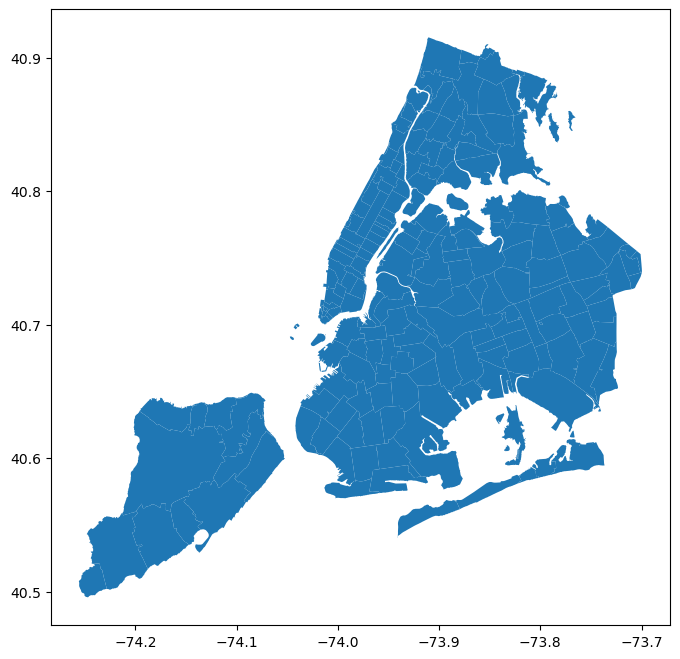

In [29]:
zips.plot(figsize=(8,8))

In [30]:
# remove rows with location outside NYC
data_NYC= data_NYC[data_NYC['COUNTY'].isin(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'])]
data_NYC['COUNTY'].value_counts()

COUNTY
Brooklyn         115574
Manhattan        113010
Bronx             90830
Queens            86265
Staten Island     10825
Name: count, dtype: int64

## Section 2 -Exploratory analysis tasks

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize type 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of type 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough


### 1. time series plotting
Visualize the time series of the total number of type 1 crimes for the whole city per day.

In [31]:
# CMPLNT_NUM' is a unique id for each complaint,
#'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively
#'OFNS_DESC' is the type of offence reported
#'BORO_NM' is name of borough where complaint was reported
#'PARKS_NM' is name of park where complaint recorded (if any)
#'Latitude', 'Longitude' are location of complaint.

In [32]:
# group total crimes by daily numbers
data_NYC_crimes= data_NYC.groupby(by='CMPLNT_FR_DT').count()[['CMPLNT_NUM']]
data_NYC_crimes.rename(columns={'CMPLNT_NUM':'Num_Of_Crimes'}, inplace=True)
data_NYC_crimes=data_NYC_crimes.reset_index()
data_NYC_crimes.head()

,CMPLNT_FR_DT,Num_Of_Crimes
0,2019-01-01,340
1,2019-01-02,207
2,2019-01-03,262
3,2019-01-04,266
4,2019-01-05,232


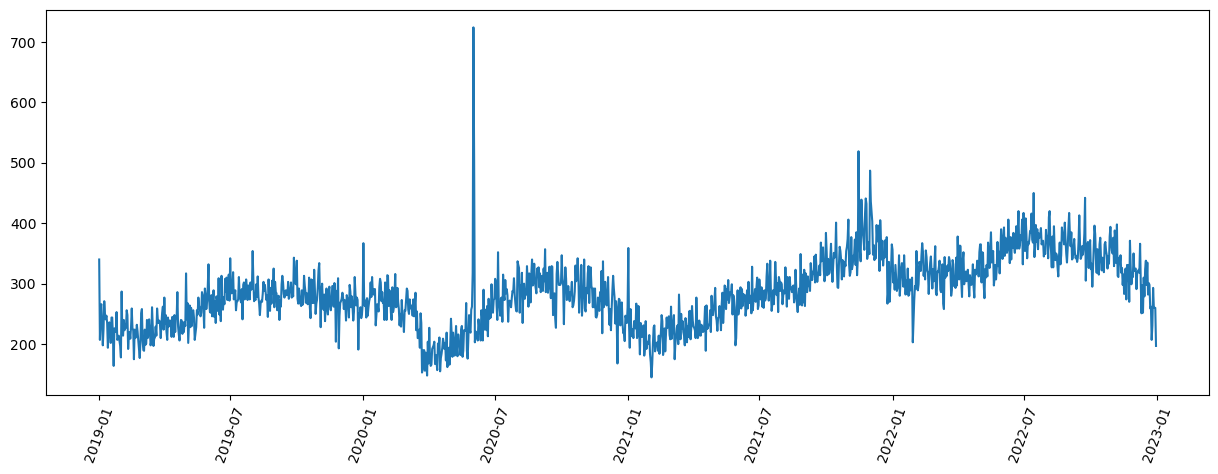

In [33]:
# plot as a time series
plt.figure(figsize=(15, 5))
plt.plot(data_NYC_crimes.CMPLNT_FR_DT, data_NYC_crimes.Num_Of_Crimes)
plt.xticks(rotation=70);
plt.show()

### 2. plotting on borough and zip code level normalized by population

In [34]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile

data_NYC_borough = zips.groupby(by='COUNTY').agg({'POPULATION':'sum'})
data_NYC_borough=data_NYC_borough.reset_index()
data_NYC_borough.head()

,COUNTY,POPULATION
0,Bronx,1431301.0
1,Brooklyn,2548896.0
2,Manhattan,1687421.0
3,Queens,2262768.0
4,Staten Island,468220.0


In [35]:
data_NYC_crimes= data_NYC.groupby(by='COUNTY').count()[['CMPLNT_NUM']]
data_NYC_crimes.rename(columns={'CMPLNT_NUM':'Num_Of_Crimes'}, inplace=True)
data_NYC_crimes=data_NYC_crimes.reset_index()
data_NYC_crimes

,COUNTY,Num_Of_Crimes
0,Bronx,90830
1,Brooklyn,115574
2,Manhattan,113010
3,Queens,86265
4,Staten Island,10825


In [36]:
data_NYC_borough = data_NYC_borough.merge(data_NYC_crimes, left_on='COUNTY', right_on='COUNTY', how='left')

In [37]:
data_NYC_borough['normalized_by_population'] = (data_NYC_crimes['Num_Of_Crimes'] / data_NYC_borough['POPULATION']) * 100000
data_NYC_borough.head()

,COUNTY,POPULATION,Num_Of_Crimes,normalized_by_population
0,Bronx,1431301.0,90830,6345.974746
1,Brooklyn,2548896.0,115574,4534.276801
2,Manhattan,1687421.0,113010,6697.202417
3,Queens,2262768.0,86265,3812.366093
4,Staten Island,468220.0,10825,2311.947375


Text(0.5, 0, 'borough')

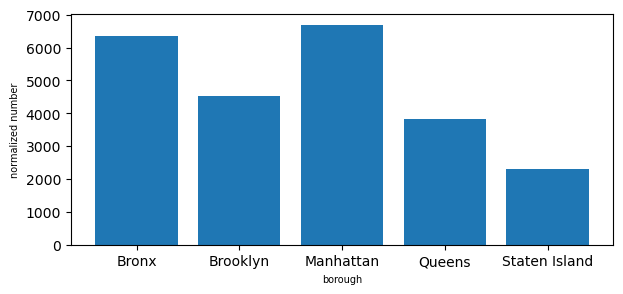

In [38]:
# plot as a bar plot
plt.figure(figsize=(7, 3))

plt.bar(data_NYC_borough.COUNTY, data_NYC_borough.normalized_by_population)
plt.xticks(data_NYC_borough.COUNTY)
plt.ylabel('normalized number', fontsize=7)
plt.xlabel('borough', fontsize=7)

In [39]:
# now group by zip codes, normalize by their population

data_NYC_zipN = data_NYC.groupby(by='ZIPCODE').agg({'CMPLNT_NUM':'count'})
data_NYC_zipN.rename(columns={'CMPLNT_NUM':'Num_Of_Crimes'}, inplace=True)
data_NYC_zipN=data_NYC_zipN.reset_index()
data_NYC_zipN.head()

,ZIPCODE,Num_Of_Crimes
0,00083,156
1,10001,3775
2,10002,4895
3,10003,4712
4,10004,172


In [40]:
data_NYC_zipP = zips.groupby(by='ZIPCODE').agg({'POPULATION':'sum'})
data_NYC_zipP=data_NYC_zipP.reset_index()
data_NYC_zipP.head()

,ZIPCODE,POPULATION
0,00083,25.0
1,10001,22413.0
2,10002,81305.0
3,10003,55878.0
4,10004,8748.0


In [41]:
data_NYC_zipP = data_NYC_zipP.merge(data_NYC_zipN, left_on='ZIPCODE', right_on='ZIPCODE', how='left')
data_NYC_zipP.head()

,ZIPCODE,POPULATION,Num_Of_Crimes
0,00083,25.0,156.0
1,10001,22413.0,3775.0
2,10002,81305.0,4895.0
3,10003,55878.0,4712.0
4,10004,8748.0,172.0


In [42]:
data_NYC_zipP=data_NYC_zipP[data_NYC_zipP['Num_Of_Crimes']!=0]
data_NYC_zipP=data_NYC_zipP[data_NYC_zipP['POPULATION']!=0] 

In [43]:
data_NYC_zipP['normalized_by_population'] = (data_NYC_zipP['Num_Of_Crimes'] / data_NYC_zipP['POPULATION']) * 100000
data_NYC_zipP.head()

,ZIPCODE,POPULATION,Num_Of_Crimes,normalized_by_population
0,00083,25.0,156.0,624000.000000
1,10001,22413.0,3775.0,16842.903672
2,10002,81305.0,4895.0,6020.539942
3,10003,55878.0,4712.0,8432.656860
4,10004,8748.0,172.0,1966.163695


In [44]:
# plot as a heatmap with quantiles color scheme

POPViz = zips.merge(data_NYC_zipP, left_on='ZIPCODE', right_on='ZIPCODE')
POPViz.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION_x,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,POPULATION_y,Num_Of_Crimes,normalized_by_population
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",18681.0,357.0,1911.032600
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679...",62426.0,3795.0,6079.197770
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668...",83866.0,2850.0,3398.278206
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670...",56527.0,3283.0,5807.844039
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650...",72280.0,777.0,1074.986165


<Axes: >

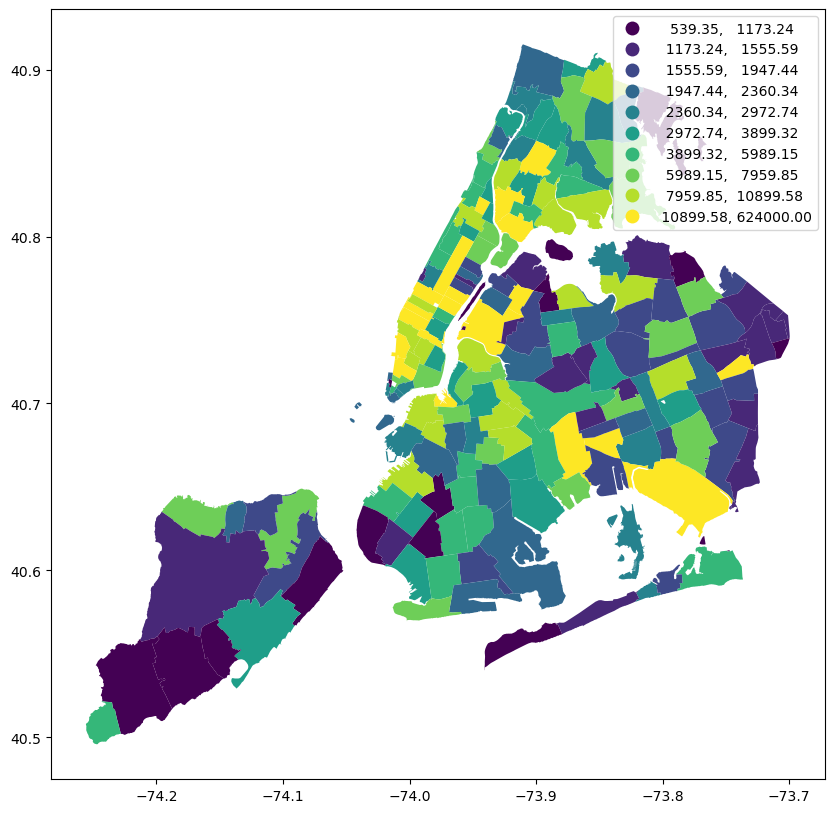

In [45]:
POPViz.plot(figsize = (10,10), column='normalized_by_population', scheme='Quantiles', k=10, legend=True)

### 3. bar plots of total type 1 crimes vs a) months b) day of week and c) hour of day

In [46]:
# code here
# months
data_NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
81,206878965,2019-12-30,13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6509575,191782128,2019-01-02,14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6509726,191914830,2019-01-05,17:22:00,01/05/2019,17:25:00,73.0,01/05/2019,105,ROBBERY,392.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6510050,191916242,2019-01-05,01:30:00,NaN,(null),73.0,01/05/2019,106,FELONY ASSAULT,105.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0
6510271,191724936,2019-01-01,13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,Brooklyn,66737.0,3.787169e+07,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0


In [47]:
data_NYC['CMPLNT_FR_TM'] = pd.to_datetime(data_NYC['CMPLNT_FR_TM'])

In [48]:
data_NYC['Month'] = data_NYC['CMPLNT_FR_DT'].dt.month
data_NYC['DOW'] = data_NYC['CMPLNT_FR_DT'].dt.dayofweek
data_NYC['Hour'] = data_NYC['CMPLNT_FR_TM'].dt.hour

In [49]:
data_NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,DOW,Hour
81,206878965,2019-12-30,2023-10-22 13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,12,0,13
6509575,191782128,2019-01-02,2023-10-22 14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,2,14
6509726,191914830,2019-01-05,2023-10-22 17:22:00,01/05/2019,17:25:00,73.0,01/05/2019,105,ROBBERY,392.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,17
6510050,191916242,2019-01-05,2023-10-22 01:30:00,NaN,(null),73.0,01/05/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,1
6510271,191724936,2019-01-01,2023-10-22 13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,1,13


In [50]:
data_Month = data_NYC.groupby(['Month']).agg({'CMPLNT_NUM':'count'})
data_Month.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
data_Month=data_Month.reset_index()
data_Month.head()

,Month,num_of_crimes
0,1,31873
1,2,28778
2,3,30672
3,4,29209
4,5,33169


<BarContainer object of 12 artists>

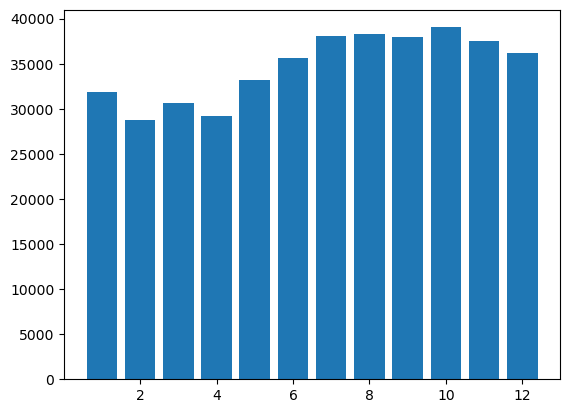

In [51]:
plt.bar(data_Month['Month'], data_Month['num_of_crimes'])

In [52]:
data_Hour = data_NYC.groupby(['Hour']).agg({'CMPLNT_NUM':'count'})
data_Hour.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
data_Hour=data_Hour.reset_index()
data_Hour.head()

,Hour,num_of_crimes
0,0,22905
1,1,15419
2,2,14177
3,3,13087
4,4,11256


<BarContainer object of 24 artists>

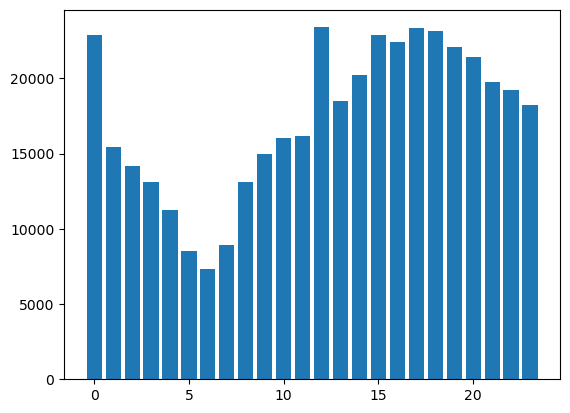

In [53]:
plt.bar(data_Hour['Hour'], data_Hour['num_of_crimes'])

In [54]:
data_DOW = data_NYC.groupby(['DOW']).agg({'CMPLNT_NUM':'count'})
data_DOW.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
data_DOW=data_DOW.reset_index()
data_DOW.head()

,DOW,num_of_crimes
0,0,60769
1,1,59066
2,2,59204
3,3,58414
4,4,63079


In [55]:
dow_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
data_DOW['DOW'] = data_DOW['DOW'].replace(dow_mapping)

<BarContainer object of 7 artists>

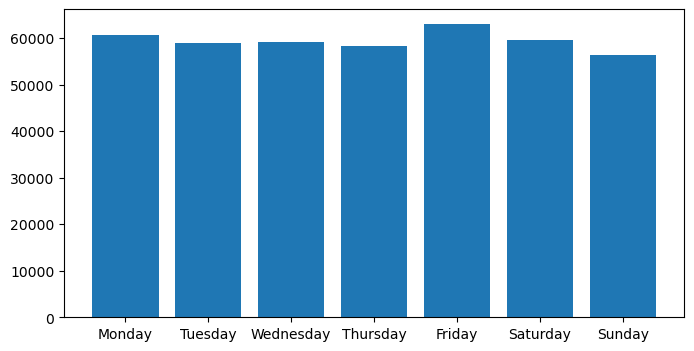

In [56]:
plt.figure(figsize=(8, 4))

plt.bar(data_DOW['DOW'], data_DOW['num_of_crimes'])

### 4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

In [57]:
total_pop=sum(zips['POPULATION'])

In [58]:
data_NYC_GL= data_NYC[data_NYC['OFNS_DESC'].isin(['GRAND LARCENY'])]
data_NYC_FA= data_NYC[data_NYC['OFNS_DESC'].isin(['FELONY ASSAULT'])]

In [59]:
# DOW

In [60]:
data_NYC_GL_DOW=data_NYC_GL.groupby(by=['DOW']).agg({'CMPLNT_NUM':'count'}).reset_index()
data_NYC_GL_DOW['normalized_by_population']=(data_NYC_GL_DOW['CMPLNT_NUM'])/total_pop*100000
data_NYC_FA_DOW=data_NYC_FA.groupby(by=['DOW']).agg({'CMPLNT_NUM':'count'}).reset_index()
data_NYC_FA_DOW['normalized_by_population']=(data_NYC_FA_DOW['CMPLNT_NUM'])/total_pop*100000
data_NYC_GL_HOD=data_NYC_GL.groupby(by=['Hour']).agg({'CMPLNT_NUM':'count'}).reset_index()
data_NYC_GL_HOD['normalized_by_population']=(data_NYC_GL_HOD['CMPLNT_NUM'])/total_pop*100000
data_NYC_FA_HOD=data_NYC_FA.groupby(by=['Hour']).agg({'CMPLNT_NUM':'count'}).reset_index()
data_NYC_FA_HOD['normalized_by_population']=(data_NYC_FA_HOD['CMPLNT_NUM'])/total_pop*100000

<Axes: xlabel='DOW'>

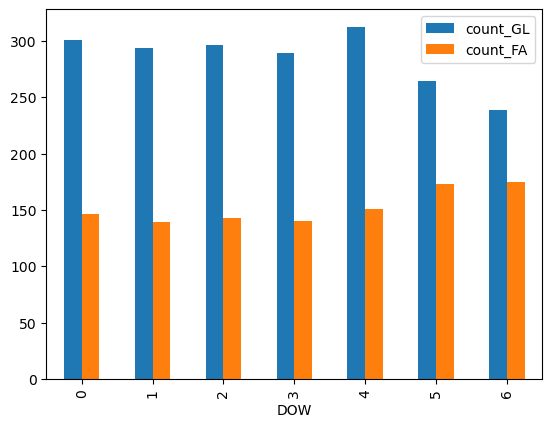

In [61]:
table_DOW=pd.DataFrame({'count_GL':data_NYC_GL_DOW['normalized_by_population'],'count_FA':data_NYC_FA_DOW['normalized_by_population']},index=data_NYC_FA_DOW['DOW'])
# table_HOD=pd.Dataframe()
table_DOW.plot.bar()

<Axes: xlabel='Hour'>

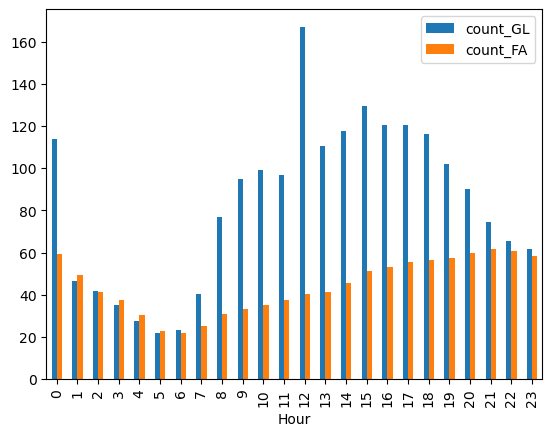

In [62]:
table_Hour=pd.DataFrame({'count_GL':data_NYC_GL_HOD['normalized_by_population'],'count_FA':data_NYC_FA_HOD['normalized_by_population']},index=data_NYC_FA_HOD['Hour'])
# table_Hour=pd.Dataframe()
table_Hour.plot.bar()

### 5. comparing the %% decomposition of type 1 crimes by category of crime

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

In [63]:
data_NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,DOW,Hour
81,206878965,2019-12-30,2023-10-22 13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,12,0,13
6509575,191782128,2019-01-02,2023-10-22 14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,2,14
6509726,191914830,2019-01-05,2023-10-22 17:22:00,01/05/2019,17:25:00,73.0,01/05/2019,105,ROBBERY,392.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,17
6510050,191916242,2019-01-05,2023-10-22 01:30:00,NaN,(null),73.0,01/05/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,1
6510271,191724936,2019-01-01,2023-10-22 13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,1,13


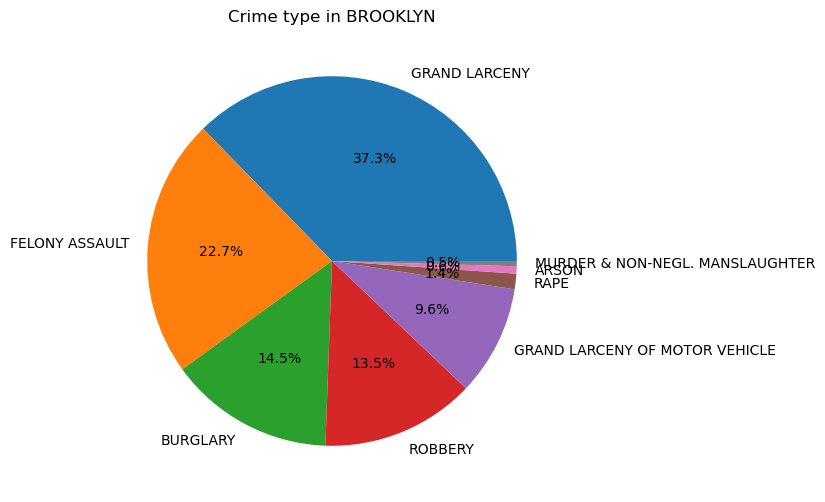

<Figure size 800x800 with 0 Axes>

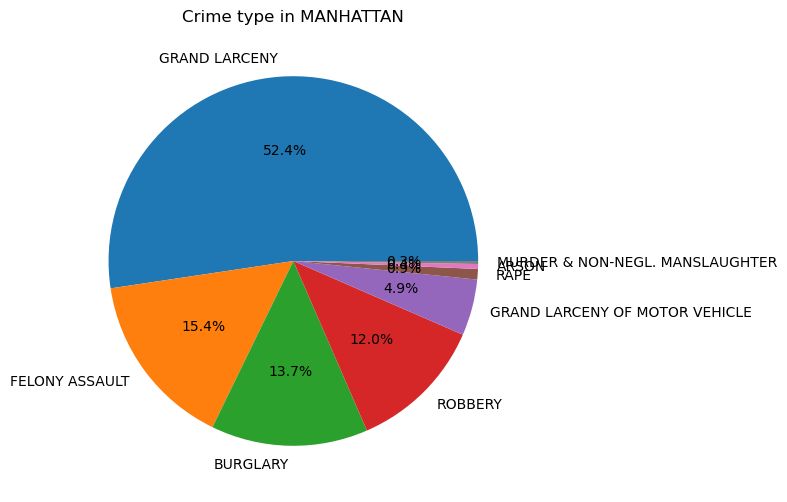

<Figure size 800x800 with 0 Axes>

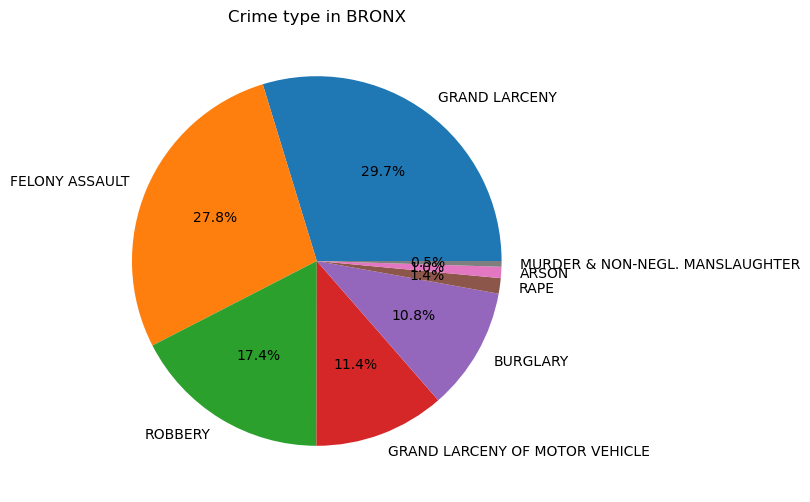

<Figure size 800x800 with 0 Axes>

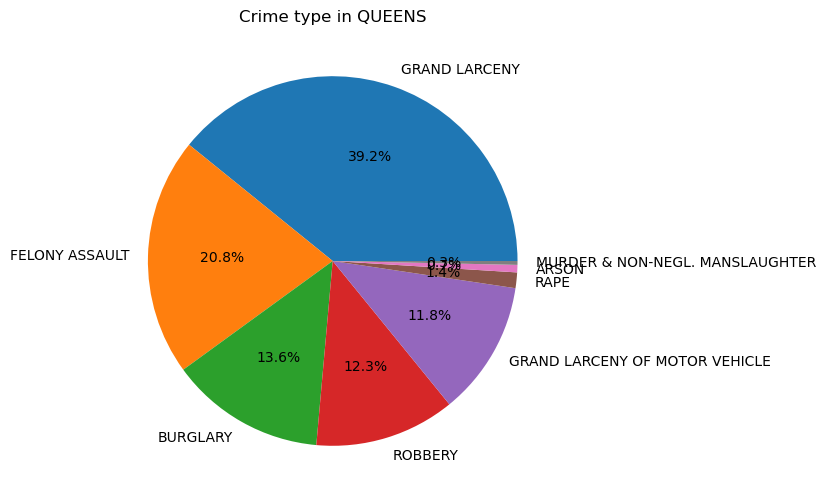

<Figure size 800x800 with 0 Axes>

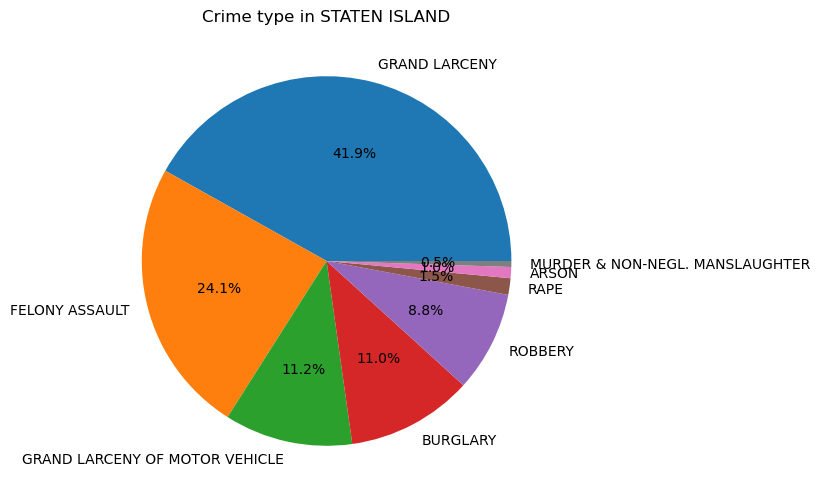

<Figure size 800x800 with 0 Axes>

In [64]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

for boro in data_NYC.BORO_NM.unique():
    
    subset = data_NYC[data_NYC['BORO_NM'] == boro]
    crime_type = subset['OFNS_DESC'].value_counts()
    plt.figure(figsize=(6,6)) 
    plt.pie(crime_type, labels=crime_type.index, autopct='%1.1f%%')
    plt.title(f'Crime type in {boro}')
    plt.figure(figsize=(8, 8))
    plt.show()


## Section 3 - Hypothesis testing tasks

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? Please give your conclusion based on coding results.

### 1. plotting distributions and normality test

In [65]:
#introduce the function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Plot the distribution (density plot) of daily number of total type 1 crimes for 2019. Test the hypothesis if the distribution follows normal distribution.

In [66]:
# choose the data of 2019
data_2019_year = data_2019[data_2019['CMPLNT_FR_DT'].dt.year == 2019]
data_2019_year.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
81,206878965,2019-12-30,13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,U,NaN,40.671130,-73.913502,"(40.6711300016904, -73.9135020552048)",PATROL BORO BKLYN NORTH,(null),<18,BLACK,M
82,206890929H1,2019-12-31,23:15:00,NaN,(null),28.0,12/31/2019,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,M,NaN,40.808418,-73.952474,"(40.8084177460021, -73.9524740603515)",PATROL BORO MAN NORTH,(null),25-44,BLACK,M
6509218,191892363,2019-01-05,03:38:00,01/05/2019,03:40:00,46.0,01/05/2019,105,ROBBERY,386.0,...,U,NaN,40.853598,-73.900577,"(40.8535983673823, -73.9005768807295)",PATROL BORO BRONX,(null),25-44,WHITE HISPANIC,M
6509242,191979091,2019-01-06,20:30:00,NaN,(null),83.0,01/07/2019,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),NaN,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),45-64,ASIAN / PACIFIC ISLANDER,M
6509247,191989005,2019-01-07,17:50:00,01/07/2019,17:55:00,40.0,01/07/2019,105,ROBBERY,397.0,...,F,NaN,40.810352,-73.924942,"(40.8103518634571, -73.924942325642)",PATROL BORO BRONX,(null),25-44,WHITE HISPANIC,F


In [67]:
# group type 1 crime numbers per day for 2019

data_2019_year_crime = data_2019_year.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count'})
data_2019_year_crime.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
data_2019_year_crime=data_2019_year_crime.reset_index()
data_2019_year_crime.head()

,CMPLNT_FR_DT,num_of_crimes
0,2019-01-01,340
1,2019-01-02,207
2,2019-01-03,262
3,2019-01-04,266
4,2019-01-05,232


Mean = 259.76
Standard deviation = 34.24
1 percentile = 185.04
5 percentile = 202.20
25 percentile = 236.00
50 percentile = 263.00
75 percentile = 284.00
95 percentile = 311.00
99 percentile = 338.72


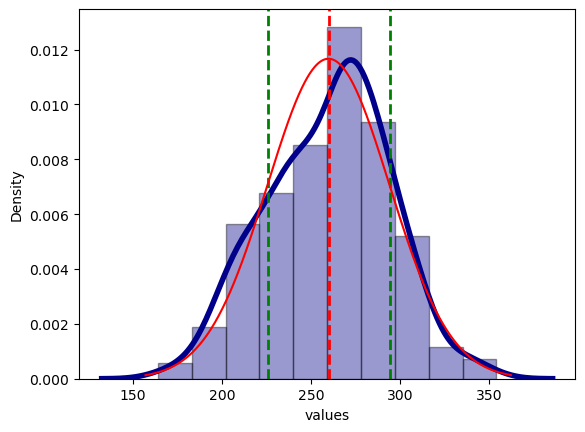

In [68]:
# plot the distribution (density plot)

distribution_analysis(data_2019_year_crime['num_of_crimes'], fit_distribution='normal', bins=10);

Log mean = 2.41(257.44), mean = 259.76
Standard deviation = 0.06
1 percentile = 185.04
5 percentile = 202.20
25 percentile = 236.00
50 percentile = 263.00
75 percentile = 284.00
95 percentile = 311.00
99 percentile = 338.72


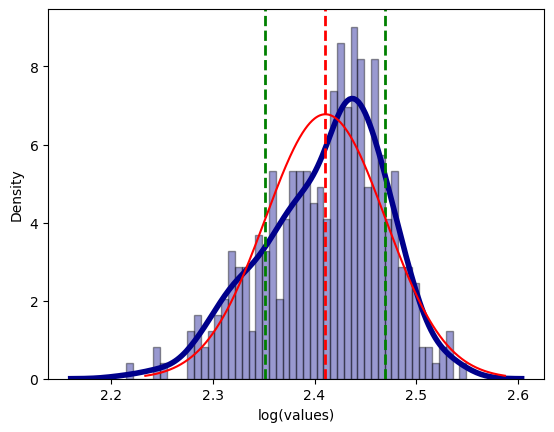

(2.4106707447201976, 0.05887538561580613)

In [69]:
# log distribution
distribution_analysis(data_2019_year_crime.num_of_crimes, log_scale=True, fit_distribution='normal')

In [70]:
def is_normal(x): #check if the distribution is normal using one-sample KS test and sample mean-std
    return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [71]:
is_normal(data_2019_year_crime['num_of_crimes'])

KstestResult(statistic=0.060414660341084, pvalue=0.1336615959619457, statistic_location=267, statistic_sign=-1)

### 2. weekdays vs weekend distribution
Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? Please give your conclusion based on coding results.

In [72]:
# create dataframes for weekdays and weekends
data_NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,DOW,Hour
81,206878965,2019-12-30,2023-10-22 13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,12,0,13
6509575,191782128,2019-01-02,2023-10-22 14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,2,14
6509726,191914830,2019-01-05,2023-10-22 17:22:00,01/05/2019,17:25:00,73.0,01/05/2019,105,ROBBERY,392.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,17
6510050,191916242,2019-01-05,2023-10-22 01:30:00,NaN,(null),73.0,01/05/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,5,1
6510271,191724936,2019-01-01,2023-10-22 13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,1,13


In [73]:
weekday=data_NYC[data_NYC['DOW'].isin([0, 1,2,3,4])]
weekend=data_NYC[data_NYC['DOW'].isin([5,6])]
weekday.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,DOW,Hour
81,206878965,2019-12-30,2023-10-22 13:30:00,12/30/2019,14:00:00,73.0,12/30/2019,105,ROBBERY,387.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,12,0,13
6509575,191782128,2019-01-02,2023-10-22 14:00:00,01/02/2019,14:55:00,73.0,01/02/2019,106,FELONY ASSAULT,109.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,2,14
6510271,191724936,2019-01-01,2023-10-22 13:30:00,01/01/2019,13:35:00,73.0,01/01/2019,106,FELONY ASSAULT,105.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,1,13
6511114,191840039,2019-01-03,2023-10-22 18:00:00,01/03/2019,18:15:00,73.0,01/03/2019,104,RAPE,159.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,3,18
6511386,191871665,2019-01-04,2023-10-22 13:30:00,01/04/2019,14:49:00,73.0,01/04/2019,106,FELONY ASSAULT,109.0,...,NY,Brooklyn,36,047,http://www.usps.com/,0.0,0.0,1,4,13


Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? Please give your conclusion based on coding results.

In [75]:
# group daily numbers for weekdays and weekends

weekday = weekday.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count','POPULATION':'sum'})
weekday.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
weekday=weekday.reset_index()
weekday['normalized_by_population'] = weekday['num_of_crimes'] / total_pop*100000
weekday.head()

,CMPLNT_FR_DT,num_of_crimes,POPULATION,normalized_by_population
0,2019-01-01,340,19265845.0,4.048291
1,2019-01-02,207,11601487.0,2.464695
2,2019-01-03,262,14651006.0,3.119565
3,2019-01-04,266,14104118.0,3.167192
4,2019-01-07,225,12838975.0,2.679016


In [76]:
weekend = weekend.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count','POPULATION':'sum'})
weekend.rename(columns={'CMPLNT_NUM':'num_of_crimes'}, inplace=True)
weekend=weekend.reset_index()
weekend['normalized_by_population'] = weekend['num_of_crimes'] / total_pop*100000
weekend.head()

,CMPLNT_FR_DT,num_of_crimes,POPULATION,normalized_by_population
0,2019-01-05,232,12741075.0,2.762363
1,2019-01-06,198,10708656.0,2.357534
2,2019-01-12,235,13193540.0,2.798083
3,2019-01-13,194,10464783.0,2.309907
4,2019-01-19,244,13682867.0,2.905244


Mean = 3.43
Standard deviation = 0.67
1 percentile = 2.01
5 percentile = 2.40
25 percentile = 2.98
50 percentile = 3.39
75 percentile = 3.87
95 percentile = 4.50
99 percentile = 4.99


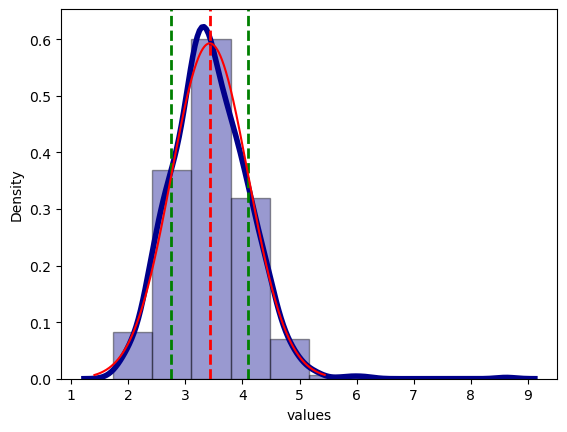

In [77]:
# plot distribution (density plot)
distribution_analysis(weekday.normalized_by_population, fit_distribution='normal', bins=10);

Mean = 3.31
Standard deviation = 0.65
1 percentile = 1.98
5 percentile = 2.26
25 percentile = 2.85
50 percentile = 3.30
75 percentile = 3.74
95 percentile = 4.42
99 percentile = 4.76


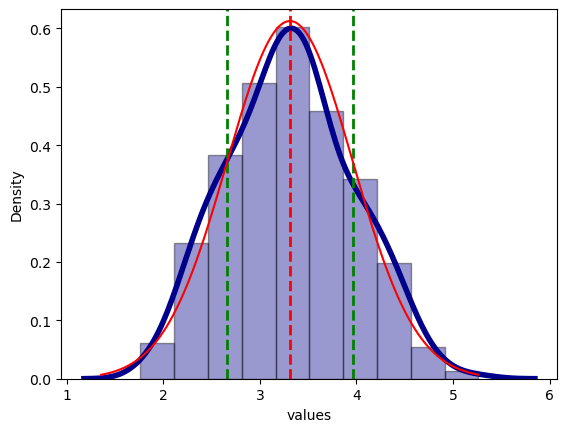

In [78]:
distribution_analysis(weekend.normalized_by_population, fit_distribution='normal', bins=10);

In [79]:
# t-test
stats.ttest_ind(weekend['normalized_by_population'],weekday['normalized_by_population'])

TtestResult(statistic=-3.0042565276863207, pvalue=0.0027076759521188903, df=1459.0)

In [80]:
# k-s test
stats.ks_2samp(weekend['normalized_by_population'],weekday['normalized_by_population'])

KstestResult(statistic=0.07380991758317484, pvalue=0.07318117727958233, statistic_location=3.607741570446334, statistic_sign=1)

Conclusion:In t-test and k-s test, the p-value are both smaller than 0.1, so we can reject the null hypothesis. Therefore, the average of number of crime as well as the distribution of the number of the crime between weekend and weekday are different.